# TP 2 - Perceptron


**Les exercices du TP 2 portent sur :**
- Régression linéaire
- Régression polynomale
- Régression logistique

## Utilisation de Jupyter Notebook

Le principe est simple : 
 - Chaque notebook est constitué d’une liste de **cellules**
 - Chacune peut contenir du **texte formaté** ou du **code** (Python, dans notre cas)
 - On **exécute** une cellule de code -> le résultat s’affiche sous la cellule

Cliquez sur le menu **Help** > **User Interface Tour** pour un tour rapide de l’interface.    

Pour vous entraîner :
- **Insérez** quelques cellules de code au début du notebook
- Exécutez quelques commandes Python, telles que **print("Hello world!")** :
    - Cliquez dans une cellule de code et saisissez le code à exécuter
    - Exécutez le code de la cellule en tapant Shift-Entrée ou en cliquant sur le bouton d’exécution
    
Lorsque vous **cliquez** à l’intérieur d’une cellule, vous passez en mode **édition** (la cellule est alors encadrée en *vert*). Lorsque vous tapez la **touche Echap** (Esc) ou que vous cliquez juste à gauche de la cellule, vous passez en mode **commande** (la cellule est alors encadrée en *bleu*). 

Lorsque vous êtes en **mode commande**, tapez la **touche H** pour afficher les nombreux **raccourcis clavier** disponibles

## Préparation

Tout d'abord, assurons-nous que ce bloc-notes fonctionne bien en python 3, importons quelques modules communs, assurons-nous que MatplotLib trace des figures :

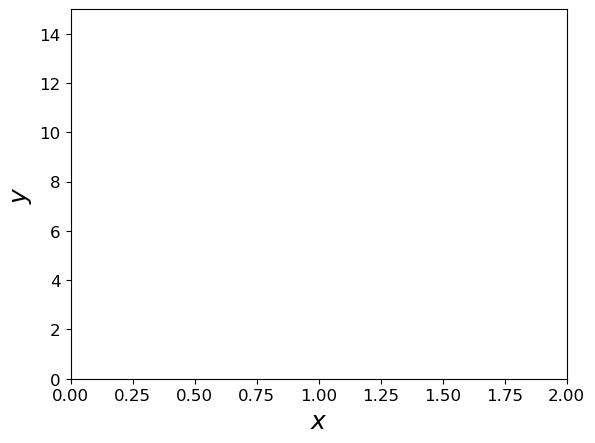

In [5]:
# Pour soutenir à la fois python 2 et python 3
from __future__ import division, print_function, unicode_literals

# Importations communes
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

# Pour que la production soit stable d'un bout à l'autre
np.random.seed(42)

# Pour tracer de jolis figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=90, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

# Perceptrons

**Note**: nous définissons explicitement `max_iter` et `tol` pour éviter les avertissements sur le fait que leur valeur par défaut va changer dans les futures versions de Scikit-Learn.

# Exercice 1 : Perceptrons avec Iris

Dans cet exercice, Utilisons le jeu de données Iris : c’est un jeu de données très connu qui comporte la longueur et la largeur des sépales et des pétales de 150 fleurs d’iris de trois espèces différentes : Iris setosa, Iris versicolor et Iris virginica.

![](https://cdn-ak.f.st-hatena.com/images/fotolife/f/fukuit/20160903/20160903124534.png)

Scikit-Learn fournit une classe Perceptron qui implémente un réseau de LTU. Nous pouvons l’employer très facilement, par exemple sur le jeu de données Iris. Le code ci-dessous construit un modèle pour savoir à quelle classe appartient une fleur.

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

**Question 1.1 :** Utiliser la [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) pour prédire à quelle classe appartient une fleur de longueur des sépales de **2** et de largeur des sépales de **0.5**

In [7]:
print('Cette iris est une',["setosa","versicolor","virginica"][per_clf.predict([[2, 0.5]])[0]])

Cette iris est une versicolor


**Question 1.2 :** Le résultat de l'apprentissage peut également être représenté sous forme graphique. A l'aide du graphique ci-dessous, dire à quelle classe appartient une fleur de longueur des sépales de 2 et de largeur des sépales de 1.25. Tracer les traits sur le schéma.

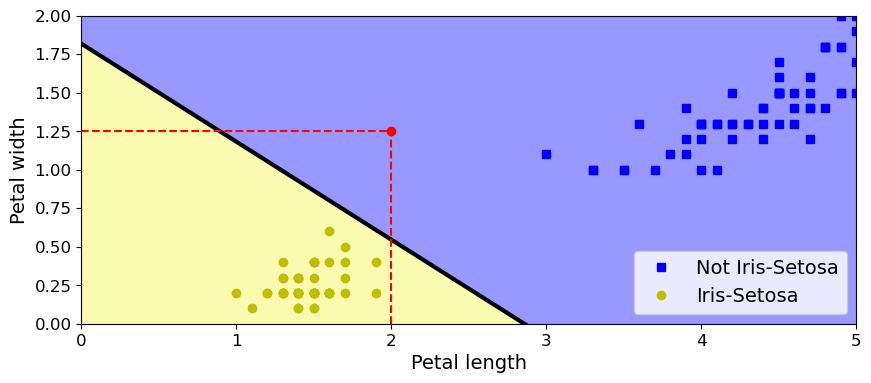

In [8]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
# draw line from abscis  to the point (2,1.25)
plt.plot([2,2],[0,1.25], "r--")
# draw line from ordinate  to the point (2,1.25)
plt.plot([0,2],[1.25,1.25], "r--")
plt.plot([2],[1.25], "ro")
plt.show()

In [9]:
print('Une fleur de longueur des sepales de 2 et de largeur des sepales de 1.25 appartient pas à la classe Iris-Setosa')

Une fleur de longueur des sepales de 2 et de largeur des sepales de 1.25 appartient pas à la classe Iris-Setosa


## Exercice 2 : Fonctions d'activation

On donne une série de fonction d'activation des neuronnes. L'objectif est d'afficher des graphiques avec leurs valeurs.

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

**Question 2.1 :** Afficher les 4 fonctions avec l'entrée du neurone en abscisse et la sortie du neurone en ordonnée. 

(-5.0, 5.0, -1.0, 2.0)

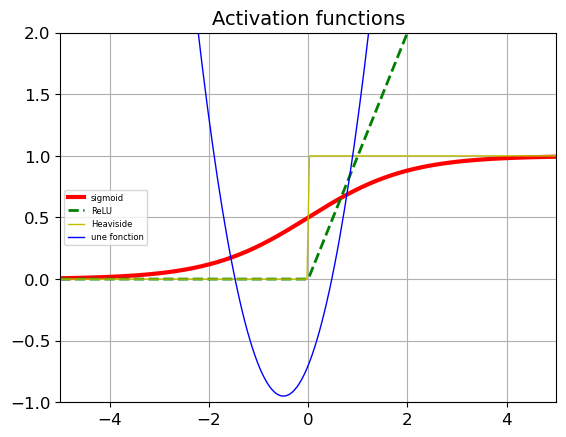

In [11]:
def uneFonction(x):
    return x*x+x-0.7
z = np.linspace(-5, 5, 200)
plt.plot(z, sigmoid(z), "r-", linewidth=3, label="sigmoid")
plt.plot(z, relu(z), "g--", linewidth=2, label="ReLU")
plt.plot(z, heaviside(z), "y-", linewidth=1, label="Heaviside")
plt.plot(z, uneFonction(z), "b-", linewidth=1, label="une fonction")
plt.grid(True)
plt.legend(loc="center left", fontsize=6)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1,2])

**Question 2.2 :** Afficher les 4 fonctions avec :
- abscisse = une valeur de -0.2 à 1.2 (*$x_1$*)
- ordonnée = une valeur de -0.2 à 1.2 (*$x_2$*)
- sur la grille : le résultat de la fonction d'activation appliquée à  *$x_1$* et *$x_2$*

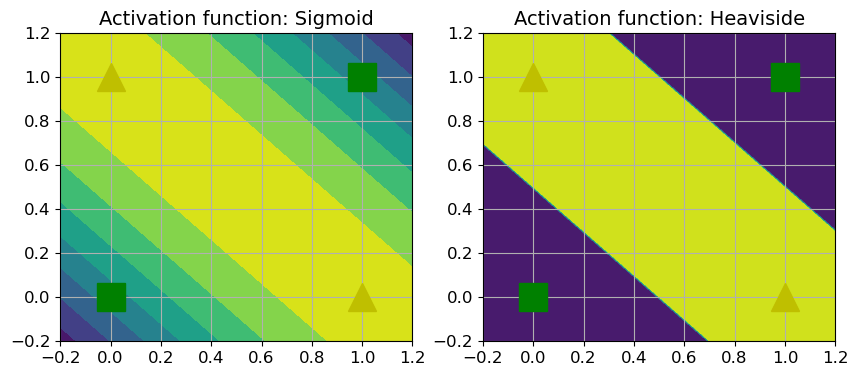

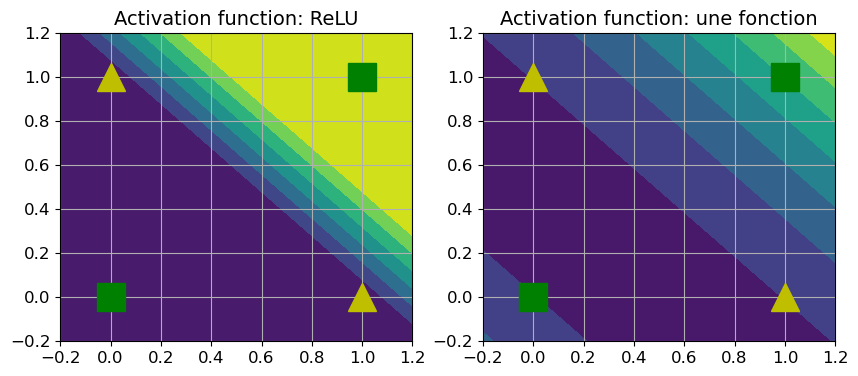

In [12]:
x1s = np.linspace(-.2, 1.2, 100)
x2s = np.linspace(-.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=sigmoid)
z2 = mlp_xor(x1, x2, activation=heaviside)
z3 = mlp_xor(x1, x2, activation=relu)
z4 = mlp_xor(x1, x2, activation=uneFonction)
plt.figure(figsize=(10,4))


def Draw(x1, x2, z2,name):
    plt.contourf(x1, x2, z2)
    plt.plot([0, 1], [0, 1], "gs", markersize=20)
    plt.plot([0, 1], [1, 0], "y^", markersize=20)
    plt.title("Activation function: "+name, fontsize=14)
    plt.grid(True)


plt.subplot(121)
Draw(x1, x2, z1,"Sigmoid")
plt.subplot(122)
Draw(x1, x2, z2,"Heaviside")
plt.show()
plt.figure(figsize=(10,4))
plt.subplot(121)
Draw(x1, x2, z3,"ReLU")
plt.subplot(122)
Draw(x1, x2, z4,"une fonction")

## Exercice 2 : Perceptron multi couche

L'objectif est de reconnaitre une lettre manuscrite après avoir entraîner une série d'images de lettres à l'aide d'un perceptron multicouche. Pour cela, on va utiliser la bibliothèque **TensorFlow** :

In [13]:
import tensorflow as tf

La base de données est bien connue. Il s'agit de [MNIST](https://en.wikipedia.org/wiki/MNIST_database). Il s’agit d’un jeu de données contenant 70 000 images de chiffres manuscrits, de 28×28 pixels et en dégradé de gris. 
![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Séparons-le en un jeu de données dédié à l’entraînement du réseau de neurones, et un jeu de données dédié au  test.

In [14]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

/usr/lib/python3/dist-packages/sklearn/datasets/_openml.py:935: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [15]:
X, y = mnist["data"], mnist["target"]
print(X.shape)

(70000, 784)


In [16]:
toto=np.array(X)
np.savetxt('X.csv', toto, delimiter=',', fmt='%d')
tutu=np.array(y.astype(np.int32))
tutu.astype(np.int32)

array([5, 0, 4, ..., 4, 5, 6], dtype=int32)

In [17]:
np.savetxt('y.csv', tutu, delimiter=',', fmt='%d')
arraa=np.loadtxt('X.csv', delimiter=',')
Xaa=arraa

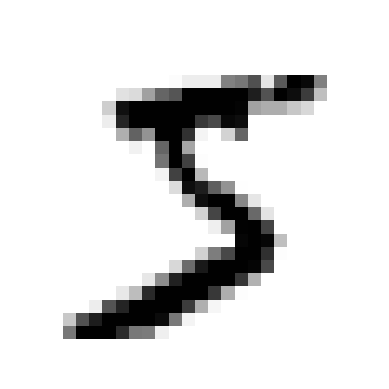

In [18]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = Xaa[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()


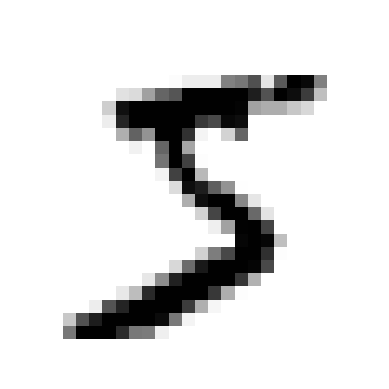

In [19]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = toto[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

In [20]:
y[0]

'5'

In [21]:
y = y.astype(np.uint8)

In [22]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28,28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28,28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [23]:
X_test[3].shape

(28, 28)

**Question 3.1 :** Combien y a-t-il de données d'entraînement et de validation ? Fournir également les chiffres en terme de pourcentage.

In [24]:
entrain=X_train.shape[0]
valid= X_valid.shape[0]
perc1=entrain/(entrain+valid)*100
perc2=valid/(entrain+valid)*100
print(f'donnees entrainement ={entrain} soit {perc1}%')
print(f'donnees validation ={valid} soit {perc2}')

donnees entrainement =55000 soit 91.66666666666666%
donnees validation =5000 soit 8.333333333333332


La matrice X_train (un tableau NumPy à deux dimensions) comporte 55 000 lignes et 784 colonnes (28×28=784). Chaque ligne représente une image, et chaque colonne représente l’intensité lumineuse d’un pixel de l’image (de 0,0 pour le blanc à 1,0 pour le noir). y_train est un tableau à une seule dimension contenant 55 000 entiers, un par image, chacun indiquant quel chiffre est représenté par l’image correspondante. Par exemple si la 5ème image de X_train représente un 9, alors le 5ème entier de y_train est égal à 9. La matrice X_test et le vecteur y_test sont similaires mais ne contiennent que 10 000 instances (nous n’utiliserons pas ici les 5 000 dernières instances disponibles dans mnist.validation).

Construisons maintenant un réseau de neurones profond avec deux couches cachées (l’une avec 300 neurones, l’autre avec 100) et une couche de sortie softmax avec 10 neurones.

**Question 3.2 :** Le code ci-dessous correspond à l'entraînement du réseau de neurones.
Après l'avoir exécuter, répondre au questions suivantes :
- Quel est le temps d'exécution total ?
45s
- Quel est l'erreur du modèle avant l'entraînement et après l'entrainement ?
Avant entrainement precision de 84.26% et fini avec une precision de 98.63%
Bien attendre que l'entrainement soit fini !

In [25]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=20)

print("===========================")
print("FINI !")

Epoch 1/20


2023-09-28 15:55:44.208342: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:521] Can't find libdevice directory ${CUDA_DIR}/nvvm/libdevice. This may result in compilation or runtime failures, if the program we try to run uses routines from libdevice.
Searched for CUDA in the following directories:
  ./cuda_sdk_lib
  /usr/local/cuda-11.8
  /usr/local/cuda
  /home/sacus/.local/lib/python3.11/site-packages/tensorflow/python/platform/../../../nvidia/cuda_nvcc
  /home/sacus/.local/lib/python3.11/site-packages/tensorflow/python/platform/../../../../nvidia/cuda_nvcc
  .
You can choose the search directory by setting xla_gpu_cuda_data_dir in HloModule's DebugOptions.  For most apps, setting the environment variable XLA_FLAGS=--xla_gpu_cuda_data_dir=/path/to/cuda will work.
2023-09-28 15:55:44.459098: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fce94001a10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-

FailedPreconditionError: Graph execution error:

Detected at node SGD/StatefulPartitionedCall_4 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/sacus/.local/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/sacus/.local/lib/python3.11/site-packages/traitlets/config/application.py", line 1046, in launch_instance

  File "/home/sacus/.local/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/sacus/.local/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/sacus/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/sacus/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/sacus/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/sacus/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/sacus/.local/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/sacus/.local/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/sacus/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/sacus/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/sacus/.local/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/sacus/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/sacus/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/sacus/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_70216/3440111670.py", line 12, in <module>

  File "/home/sacus/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/sacus/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1783, in fit

  File "/home/sacus/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1377, in train_function

  File "/home/sacus/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1360, in step_function

  File "/home/sacus/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1349, in run_step

  File "/home/sacus/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1130, in train_step

  File "/home/sacus/.local/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/sacus/.local/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/sacus/.local/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/sacus/.local/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/sacus/.local/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/sacus/.local/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node SGD/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_802]

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

Le résultat ci-dessous permet de tester les données de validation :

In [ ]:
model.evaluate(X_valid, y_valid)

**Question 3.3 :** Compléter le tableau ci-dessous en testant plusieurs architectures différentes :

| Nb neurones couche 1 | Nb neurones  couche 2 | Nb neurones  sortie | Précision | Perte | Temps |
| :------------------: | :-------------------: | :-----------------: | :-------: | :---: | :---: |
|          10           |           10           |          10          |     0.9330    |   0.2358    |   23s   |
|          50           |           50           |          10          |     0.9741     |   0.0902    |   25s   |
|          100           |           100           |          10          |     0.9799     |   0.0723    |   28s   |
|          500           |           500           |          10          |     0.9872     |   0.0495    |   1m10s   |

**Question 3.4 :** Refaire l'apprentissage avec les valeurs optimales. **Ecrire des lettres sur une feuille de papier les prendre en photo et vérifier que la lettre est bien reconnue.**

Lecture et Affichage de votre image :

In [ ]:
from PIL import Image
## Mettre le nom de votre photo
img = Image.open("chiffre.jpeg")
## Changer la taille de l'image
basewidth = 28
img = img.resize((basewidth,basewidth))
## Affiche l'image redimmensionnée
print("image couleur :")
display(img)
## Converti l'image en niveau de gris
img=img.convert('L')
print("image niveau de gris :")

display(img)
## Converti en tableau
arr = 255-np.fromiter(iter(img.getdata()), np.uint32)
arr.resize(img.height, img.width)
arr=np.reshape(arr,(1,28,28))
#print("image en tableau :")
#display(arr)
arr.shape

image couleur :


image niveau de gris :


(1, 28, 28)

Le code ci-dessous prédit les valeurs sur l'exemple visualisé plus tôt (Cf code précédent)

1/1 [==============================] - 0s 14ms/step
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


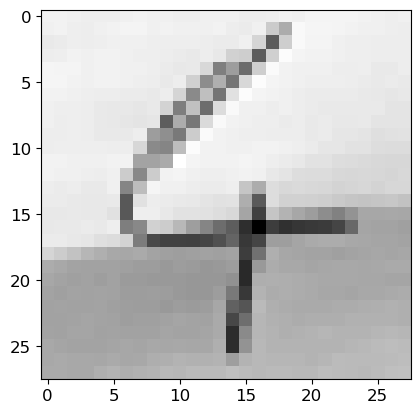

In [ ]:
array=np.size(arr)
some_digit =np.reshape(arr,(array))
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
y_pred_iter = model.predict(arr)
y_pred = list(y_pred_iter)
print(y_pred[0]) # Classe reconnue

**Question 3.4 :** Trouver à quelle classe appartient votre photo. Expliquer le résultat.

In [ ]:
print('Cette image est un',y_pred[0].argmax()+1)

Cette image est un 4


réponse avec du texte